## Preparing the data

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
# change working directory to model folder
os.chdir("C:\\Users\\brian\\Desktop\\minor\\AI project\\model")

# save the data from the csv file
train_data = pd.read_csv('petfinder-pawpularity-score/train.csv')

# check if the data was read correctly and if there are NaN values
display(train_data.head(5))
print(f'NaN amount: {train_data.isnull().sum().sum()}')

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


NaN amount: 0


In [3]:
def load_images_from_folder(folder, data = [], size=64):
    """
    This function takes a folder in which the images are saved, a dataframe of tabular data and size.
    It loads in an image finds the corresponding name and Pawpularity score and saves those so that they are ordered.
    It returns an array of images, a list of labels and a list of names.
    """
    # create empty lists for the data
    images = []
    labels = []
    names = []
    
    # iterate over all images in the given folder
    for filename in os.listdir(folder):
        
        # extract the name from the image
        name = filename.strip('.jpg')
        
        # add the name to the list of names
        names.append(name)
        
        # use the name to find the corresponding pawpularity score and add it to the list of scores
        labels.append(data.loc[data['Id']== name]['Pawpularity'].item())
        
        # resize the image to the given size and add it to the list of images
        img = cv2.resize(cv2.imread(os.path.join(folder,filename)), (size, size))
        if img is not None:
            images.append(img/255)
            
    # return the array of images and lists of labels and names
    return np.array(images), labels, names

data_images, data_labels, data_names = load_images_from_folder('petfinder-pawpularity-score/train', data = train_data)

print(f'Images loaded: {data_images.shape}')

Images loaded: (9912, 64, 64, 3)


In [4]:
X = np.array(train_data[['Subject Focus', 'Eyes', 'Face', 'Near', "Action", 'Accessory','Group', 'Collage','Human', 'Occlusion', 'Info', 'Blur']])

In [5]:
# split the data into 67% training data and 33% testing data
image_train, image_test, label_train, label_test, X_train, X_test = train_test_split(data_images, data_labels, X, test_size=0.33, random_state=42)

In [6]:
# check if the labels match the names of the images
print('checking training data: ')
print(label_train[0])


checking training data: 
17


## Making the image model

In [7]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, preprocessing, utils
import tensorflow as tf

In [8]:
def train_and_evaluate(model, train_x, train_y, val_x, val_y, X_train, X_test, preprocess={}, epochs=20, augment={}):
    ''' Make the model to train and evaluate the data'''

    
    
    # compile the model using adam as optimizer with mean squared error as loss function
    model.compile(optimizer='adam',
              loss='MSE',
              metrics=['RootMeanSquaredError'])

    train_gen = preprocessing.image.ImageDataGenerator(preprocess, augment)
    train_gen.fit(train_x) 

    val_gen = preprocessing.image.ImageDataGenerator(**preprocess)
    val_gen.fit(val_x)

    # estimate the model using the compile 
    history = model.fit(train_gen.flow((train_x, X_train), train_y), epochs=epochs, 
                        validation_data=val_gen.flow((val_x, X_test), val_y))

    fig, axs = plt.subplots(1,2,figsize=(20,5)) 

    # plot the learning curves
    for i, metric in enumerate(['loss', 'RootMeanSquaredError']):
        axs[i].plot(history.history[metric])
        axs[i].plot(history.history['val_'+metric])
        axs[i].legend(['training', 'validation'], loc='best')

        axs[i].set_title('Model '+metric)
        axs[i].set_ylabel(metric)
        axs[i].set_xlabel('epoch')

    plt.show()



  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 208 steps, validate for 103 steps
Epoch 1/25
208/208 [==============================] - 8s 37ms/step - loss: 540.7252 - RootMeanSquaredError: 23.2613 - val_loss: 514.0336 - val_RootMeanSquaredError: 22.7338
Epoch 2/25
208/208 [==============================] - 3s 16ms/step - loss: 448.3065 - RootMeanSquaredError: 21.1782 - val_loss: 458.7491 - val_RootMeanSquaredError: 21.4898
Epoch 3/25
208/208 [==============================] - 3s 16ms/step - loss: 428.8202 - RootMeanSquaredError: 20.7144 - val_loss: 463.8851 - val_RootMeanSquaredError: 21.6092
Epoch 4/25
208/208 [==============================] - 3s 15ms/step - loss: 421.5605 - RootMeanSquaredError: 20.5360 - val_loss: 445.1431 - val_RootMeanSquaredError: 21.1599
Epoch 5/25
208/208 [==============================] - 3s 16ms/step - loss: 415.3660 - RootMeanSquaredError: 20.3835 - val_loss: 454.9559 - val_RootMeanSquaredError: 21.3837
Epoch 6/25
208/208 [=====================

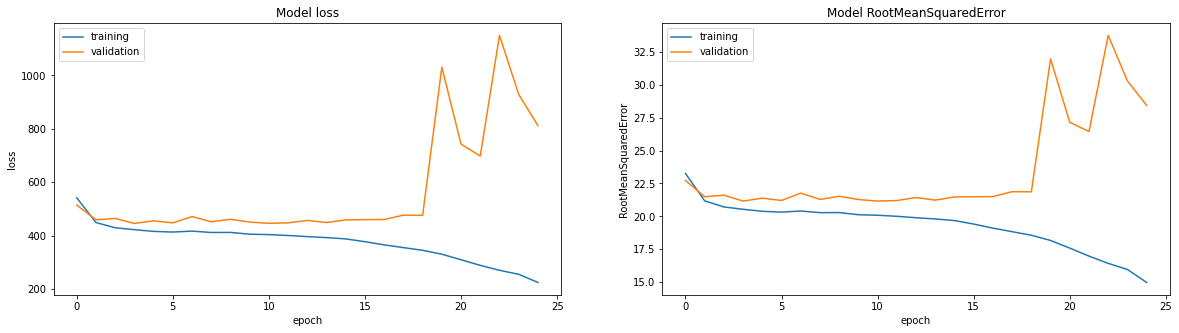

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 208 steps, validate for 103 steps
Epoch 1/25
208/208 [==============================] - 4s 21ms/step - loss: 550.7066 - RootMeanSquaredError: 23.4703 - val_loss: 800.1880 - val_RootMeanSquaredError: 28.2986
Epoch 2/25
208/208 [==============================] - 3s 16ms/step - loss: 469.9327 - RootMeanSquaredError: 21.6691 - val_loss: 474.7366 - val_RootMeanSquaredError: 21.8162
Epoch 3/25
208/208 [==============================] - 3s 16ms/step - loss: 433.9879 - RootMeanSquaredError: 20.8288 - val_loss: 468.4837 - val_RootMeanSquaredError: 21.6704
Epoch 4/25
208/208 [==============================] - 3s 16ms/step - loss: 423.6317 - RootMeanSquaredError: 20.5745 - val_loss: 449.2232 - val_RootMeanSquaredError: 21.2252
Epoch 5/25
208/208 [==============================] - 3s 16ms/step - loss: 416.3357 - RootMeanSquaredError: 20.3975 - val_loss: 453.5702 - val_RootMeanSquaredError: 21.3247
Epoch 6/25
208/208 [=====================

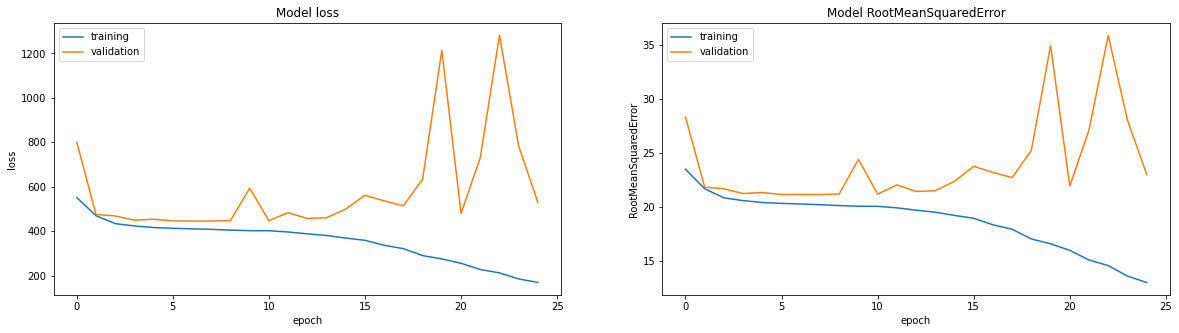

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 208 steps, validate for 103 steps
Epoch 1/25
208/208 [==============================] - 4s 21ms/step - loss: 539.8128 - RootMeanSquaredError: 23.2359 - val_loss: 522.1995 - val_RootMeanSquaredError: 22.8815
Epoch 2/25
208/208 [==============================] - 3s 16ms/step - loss: 466.7753 - RootMeanSquaredError: 21.5962 - val_loss: 487.8225 - val_RootMeanSquaredError: 22.1232
Epoch 3/25
208/208 [==============================] - 3s 16ms/step - loss: 434.8236 - RootMeanSquaredError: 20.8503 - val_loss: 459.4252 - val_RootMeanSquaredError: 21.4732
Epoch 4/25
208/208 [==============================] - 3s 16ms/step - loss: 424.3771 - RootMeanSquaredError: 20.5962 - val_loss: 751.7957 - val_RootMeanSquaredError: 27.4301
Epoch 5/25
208/208 [==============================] - 3s 16ms/step - loss: 416.0536 - RootMeanSquaredError: 20.3956 - val_loss: 610.9689 - val_RootMeanSquaredError: 24.7253ss: 44
Epoch 6/25
208/208 [===============

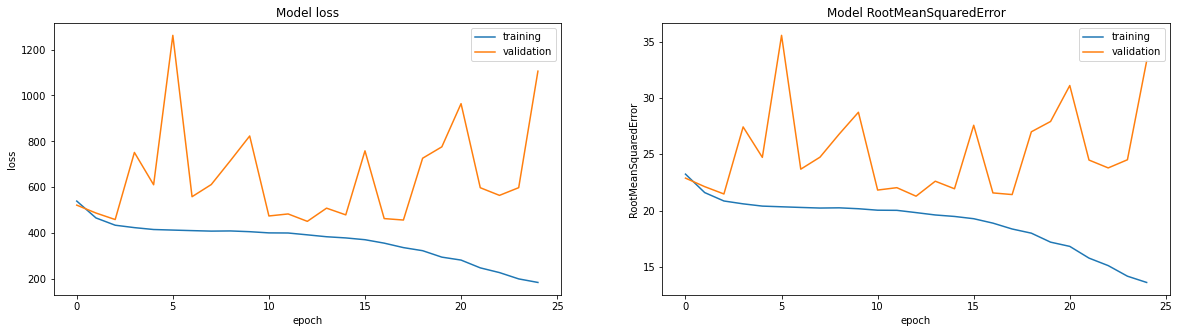

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 208 steps, validate for 103 steps
Epoch 1/25
208/208 [==============================] - 4s 22ms/step - loss: 549.2555 - RootMeanSquaredError: 23.4328 - val_loss: 484.2336 - val_RootMeanSquaredError: 21.9955
Epoch 2/25
208/208 [==============================] - 3s 16ms/step - loss: 449.8822 - RootMeanSquaredError: 21.2069 - val_loss: 464.5788 - val_RootMeanSquaredError: 21.5453
Epoch 3/25
208/208 [==============================] - 3s 16ms/step - loss: 431.4182 - RootMeanSquaredError: 20.7731 - val_loss: 1397.4706 - val_RootMeanSquaredError: 37.4338
Epoch 4/25
208/208 [==============================] - 3s 16ms/step - loss: 422.4124 - RootMeanSquaredError: 20.5580 - val_loss: 1636.2882 - val_RootMeanSquaredError: 40.5410
Epoch 5/25
208/208 [==============================] - 3s 16ms/step - loss: 416.5574 - RootMeanSquaredError: 20.4141 - val_loss: 719.5914 - val_RootMeanSquaredError: 26.7990
Epoch 6/25
208/208 [===================

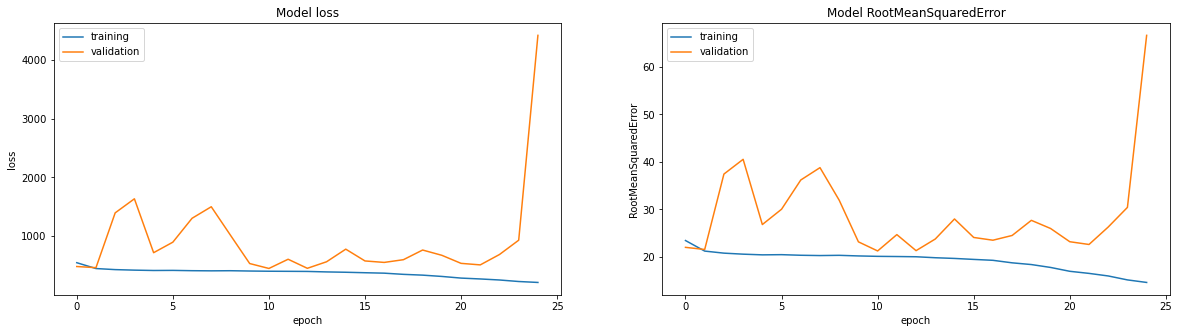

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 208 steps, validate for 103 steps
Epoch 1/25
208/208 [==============================] - 4s 21ms/step - loss: 560.1200 - RootMeanSquaredError: 23.6675 - val_loss: 490.8865 - val_RootMeanSquaredError: 22.1597
Epoch 2/25
208/208 [==============================] - 3s 16ms/step - loss: 459.2231 - RootMeanSquaredError: 21.4333 - val_loss: 567.5960 - val_RootMeanSquaredError: 23.8087
Epoch 3/25
208/208 [==============================] - 3s 16ms/step - loss: 432.9753 - RootMeanSquaredError: 20.8055 - val_loss: 2327.9446 - val_RootMeanSquaredError: 48.2413
Epoch 4/25
208/208 [==============================] - 3s 16ms/step - loss: 424.7594 - RootMeanSquaredError: 20.6097 - val_loss: 2571.9518 - val_RootMeanSquaredError: 50.7264
Epoch 5/25
208/208 [==============================] - 3s 16ms/step - loss: 415.7622 - RootMeanSquaredError: 20.3895 - val_loss: 556.2523 - val_RootMeanSquaredError: 23.5858
Epoch 6/25
208/208 [===================

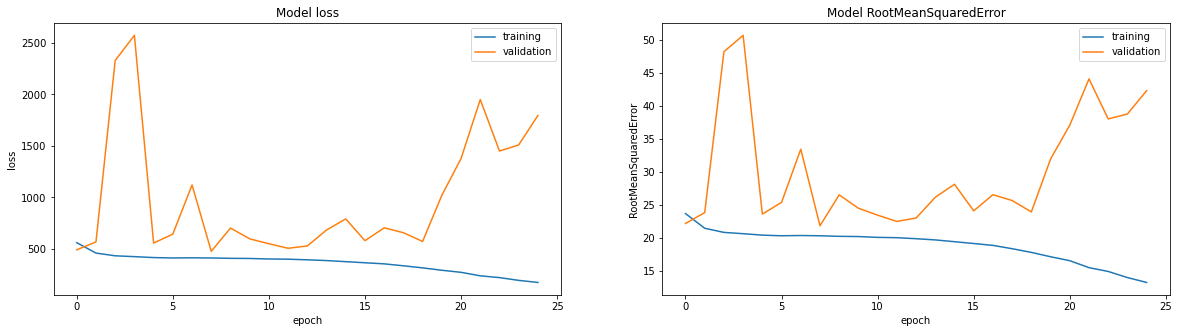

In [9]:
kfold = KFold(n_splits=5, shuffle=True)

for train, test in kfold.split(data_images, data_labels):
    # create the CNN model by adding the layers
    model_img = tf.keras.Input(shape = image_train.shape[1:], name = 'IMG')

    model_img_1 = tf.keras.layers.Conv2D(64,(3,3),activation='relu' ,padding='same', name = 'IMG_1')(model_img)
    model_img_2 = tf.keras.layers.MaxPool2D((2,2))(model_img_1)

    # second layer
    model_img_3 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(model_img_2)
    model_img_4 = tf.keras.layers.MaxPool2D((2,2))(model_img_3)
    model_img_5 = tf.keras.layers.BatchNormalization()(model_img_4)

    # third layer
    model_img_6 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(model_img_5)
    model_img_7 = tf.keras.layers.MaxPool2D((2,2))(model_img_6)
    model_img_8 = tf.keras.layers.BatchNormalization()(model_img_7)

    # fourth layer
    model_img_9 = tf.keras.layers.Dropout(0.1)(model_img_8)
    model_img_10 = tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same')(model_img_9)
    model_img_11 = tf.keras.layers.MaxPool2D((2,2))(model_img_10)
    model_img_12 = tf.keras.layers.BatchNormalization()(model_img_11)


    model_img_13 = tf.keras.layers.Flatten()(model_img_12)

    model_img_14 = tf.keras.layers.Dropout(0.4)(model_img_13)
    model_img_15 = tf.keras.layers.Dense(512,activation='relu')(model_img_14)

    model_img_16 = tf.keras.layers.Dropout(0.4)(model_img_15)
    model_img_17 = tf.keras.layers.Dense(256,activation='relu')(model_img_16)

    model_img_18 = tf.keras.layers.Dropout(0.4)(model_img_17)
    model_img_19 = tf.keras.layers.Dense(128,activation='relu')(model_img_18)

    model_img_20 = tf.keras.layers.Dropout(0.4)(model_img_19)


    ##### tabular
    tabular = tf.keras.Input(shape = X.shape[1:], name = 'tabular') 
    tabular1 = tf.keras.layers.Dense(30, activation='relu', name='tabular1')(tabular)
    tabular2 = tf.keras.layers.Dense(50, activation='relu', name='tabular2')(tabular1)
    tabular3 = tf.keras.layers.Dense(30, activation='relu', name='tabular3')(tabular2)
    tabular4 = tf.keras.layers.Dense(10, activation='relu', name='tabular4')(tabular3)

    model_concat = tf.keras.layers.Concatenate(name = 'connection', axis = 1)([tabular4, model_img_20])

    model_fin = tf.keras.layers.Dense(1, activation = 'linear', name = 'finished' )(model_concat)


    model = tf.keras.Model(inputs = [model_img, tabular], outputs = model_fin)

    preprocess = {'featurewise_center': True, 'featurewise_std_normalization' : True}
    augment = {'rotation_range' : 30, 'vertical_flip' : True}

    # train the model and evaluate it with the test_data
    train_and_evaluate(model, image_train, label_train, image_test, label_test, X_train, X_test, preprocess, epochs=25, augment = augment)

This dataset is from a competition in which you have to estimate the 8 images below, these are our scores as of now.

In [10]:
test_images = []
test_names = []

# iterate over the test images
for filename in os.listdir('petfinder-pawpularity-score/test'):
    
    # get the names of the test images and save these in the list
    name = filename.strip('.jpg')
    test_names.append(name)
    
    # save the images 
    img = cv2.imread(os.path.join('petfinder-pawpularity-score/test',filename))
    if img is not None:
        test_images.append(img)

In [11]:
# convert the list of images to an array
test_images = np.array(test_images)

# use the model to predict the pawpularity scores of the test images
model.predict(test_images)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), for inputs ['IMG', 'tabular'] but instead got the following list of 1 arrays: [array([[[[ 74,  89,  62],
         [235, 177, 165],
         [184,  85,  65],
         ...,
         [130, 108, 180],
         [  0,  11, 114],
         [ 31,  90, 193]],

        [[185, 149,  61],
 ...